# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

In [13]:
import pandas as pd 
import matplotlib.pyplot as plt  
from sklearn.linear_model import LinearRegression
import numpy as np 
import plotly.express as px
from sklearn.model_selection import train_test_split



In [5]:
#step 0 Load dataset
df_raw=pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv')
# dataframe = pd.read_csv('../path/to/file.csv')
# dataframe.describe()

In [6]:
#step 1 Basic exploration
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df_raw.sample(10)

,age,sex,bmi,children,smoker,region,charges
750,37,female,26.400,0,yes,southeast,19539.24300
878,41,male,28.800,1,no,southwest,6282.23500
766,47,male,32.300,1,no,southwest,8062.76400
1006,28,male,29.260,2,no,northeast,4438.26340
595,46,female,33.725,1,no,northeast,8823.98575
160,42,female,26.600,0,yes,northwest,21348.70600
1132,57,male,40.280,0,no,northeast,20709.02034
953,44,male,30.200,2,yes,southwest,38998.54600
440,31,female,32.680,1,no,northwest,4738.26820
1012,61,female,33.330,4,no,southeast,36580.28216


In [8]:
#step 2 make the transformation para que el dataset se adecue para pasarlo a una matriz de solo numeros
# tenemos 3 variables categóricas. En un dataset heterogeno las var categoricas van a ser las estratas.

df_raw.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [9]:
df_raw.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [10]:
df_raw.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [11]:
#encoding codifcar el valor de las var categóricas
#rules: columnas de la clase x = categorías -1

df_raw['sex_female']=df_raw['sex'].apply(lambda x:1 if x=='female'  else 0)
df_raw['smoker_yes']=df_raw['smoker'].apply(lambda x:1 if x=="yes" else 0)
df_raw['region_sw']=df_raw['region'].apply(lambda x:1 if x=="southwest" else 0)
df_raw['region_nw']=df_raw['region'].apply(lambda x:1 if x=="northwest" else 0)
df_raw['region_ne']=df_raw['region'].apply(lambda x:1 if x=="northeast" else 0)
df_raw=df_raw.drop(['sex','smoker','region'],axis=1)
df_interim=df_raw.copy()







In [12]:
df_interim.sample(10)

,age,bmi,children,charges,sex_female,smoker_yes,region_sw,region_nw,region_ne
1094,50,33.700,4,11299.34300,1,0,1,0,0
866,18,37.290,0,1141.44510,0,0,0,0,0
405,52,38.380,2,11396.90020,1,0,0,0,1
818,47,26.125,1,23401.30575,1,1,0,0,1
667,40,32.775,2,40003.33225,1,1,0,1,0
934,32,37.180,2,4673.39220,0,0,0,0,0
67,40,26.315,1,6389.37785,0,0,0,1,0
1144,50,32.300,2,9630.39700,0,0,1,0,0
821,26,17.670,0,2680.94930,0,0,0,1,0
1000,30,22.990,2,17361.76610,0,1,0,1,0


In [14]:
#step 3 (3.1,3.2,3.3)  y luego EDA con dataset de entrenamiento
#evitar data leakage
#3.1 sacar el dataset de prueba y trabajar con el de aprendizaje

X=df_interim[['age','bmi','children','sex_female','smoker_yes','region_sw','region_nw','region_ne']]
y=df_interim['charges']

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=40)




In [16]:
y_train

404      3260.19900
801     14313.84630
436      2254.79670
335     13822.80300
644     18806.14547
           ...     
1330    12629.16560
1016     2709.24395
165     10407.08585
7        7281.50560
219     25081.76784
Name: charges, Length: 1003, dtype: float64

In [17]:
type(y_train)

pandas.core.series.Series

In [22]:
#step 3.2 estadísticas básicas 
X_train.describe()

,age,bmi,children,sex_female,smoker_yes,region_sw,region_nw,region_ne
count,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000
mean,39.419741,30.712687,1.093719,0.493519,0.207378,0.245264,0.242273,0.240279
std,14.107312,6.022157,1.210891,0.500207,0.405631,0.430458,0.428672,0.427466
min,18.000000,15.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,26.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,40.000000,30.495000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,52.000000,34.590000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,64.000000,53.130000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000


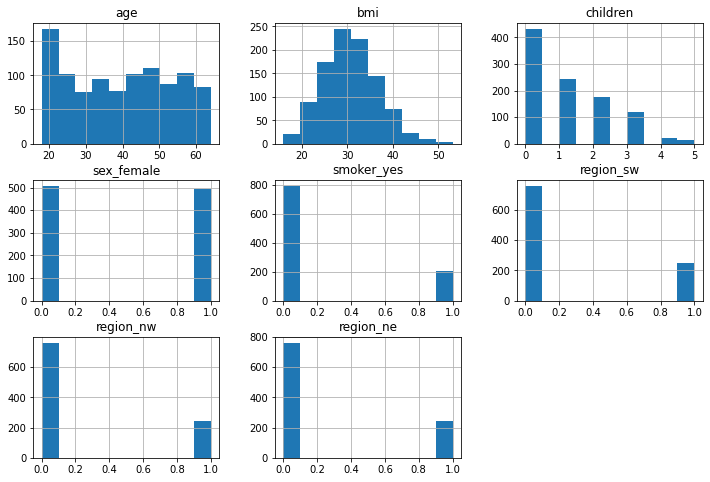

In [23]:
#step 3.3 análisis univariado
X_train.hist(figsize=(12,8))
plt.show()

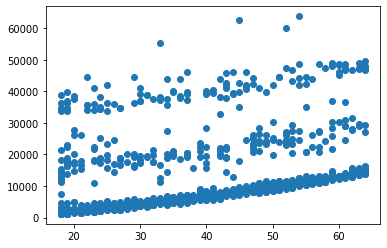

In [24]:
# step 3.4 Análisis bi variado
# encontramos 3 estratos que enmascaran la regresión con la edad.
plt.scatter(x=X_train['age'],y=y_train)
plt.show()

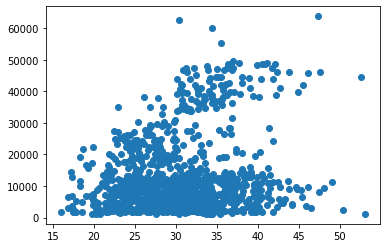

In [25]:
 

plt.scatter(x=X_train['bmi'],y=y_train)
plt.show()

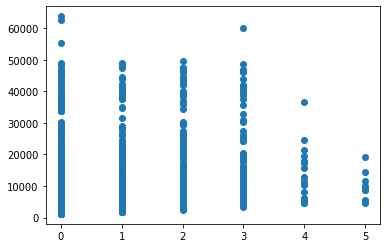

In [27]:
plt.scatter(x=X_train['children'],y=y_train)
plt.show()

In [28]:
#ver que variables están correlacionadas (se da entre var continuas)
#step 3.5ver correlaciones
X_train.corr()


,age,bmi,children,sex_female,smoker_yes,region_sw,region_nw,region_ne
age,1.000000,0.112148,0.033683,0.024641,-0.007902,-0.031103,0.016999,-0.003667
bmi,0.112148,1.000000,-0.006800,-0.058002,0.011736,-0.024031,-0.108667,-0.152964
children,0.033683,-0.006800,1.000000,-0.015473,0.011188,0.013298,0.038888,-0.031980
sex_female,0.024641,-0.058002,-0.015473,1.000000,-0.057313,0.007389,0.009657,-0.018381
smoker_yes,-0.007902,0.011736,0.011188,-0.057313,1.000000,-0.022948,-0.042431,-0.017141
region_sw,-0.031103,-0.024031,0.013298,0.007389,-0.022948,1.000000,-0.322341,-0.320591
region_nw,0.016999,-0.108667,0.038888,0.009657,-0.042431,-0.322341,1.000000,-0.318000
region_ne,-0.003667,-0.152964,-0.031980,-0.018381,-0.017141,-0.320591,-0.318000,1.000000


In [ ]:
#no encontramos correlación mayor a 0.8


In [29]:
X_train.corr().style.background_gradient(cmap='Blues')

,age,bmi,children,sex_female,smoker_yes,region_sw,region_nw,region_ne
age,1.000000,0.112148,0.033683,0.024641,-0.007902,-0.031103,0.016999,-0.003667
bmi,0.112148,1.000000,-0.006800,-0.058002,0.011736,-0.024031,-0.108667,-0.152964
children,0.033683,-0.006800,1.000000,-0.015473,0.011188,0.013298,0.038888,-0.031980
sex_female,0.024641,-0.058002,-0.015473,1.000000,-0.057313,0.007389,0.009657,-0.018381
smoker_yes,-0.007902,0.011736,0.011188,-0.057313,1.000000,-0.022948,-0.042431,-0.017141
region_sw,-0.031103,-0.024031,0.013298,0.007389,-0.022948,1.000000,-0.322341,-0.320591
region_nw,0.016999,-0.108667,0.038888,0.009657,-0.042431,-0.322341,1.000000,-0.318000
region_ne,-0.003667,-0.152964,-0.031980,-0.018381,-0.017141,-0.320591,-0.318000,1.000000
